# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
env_info.vector_observations

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.65278625, -1.5       , -0.        ,  0.        ,
         6.83172083,  6.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.4669857 , -1.5       ,  0.        ,  0.        ,
        -6.83172083,  6.        ,  0.        ,  0.        ]])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


In [7]:
actions = np.random.randn(num_agents, action_size)
actions

array([[ 0.46831072,  1.2786912 ],
       [ 0.54620409, -0.31826546]])

In [8]:
actions = np.clip(actions, -1, 1) 
actions

array([[ 0.46831072,  1.        ],
       [ 0.54620409, -0.31826546]])

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
# https://knowledge.udacity.com/questions/25366
# In the original OUNoise code of MADDPG from Udacity, the sigma=0.2 is too small, and there is a extra scale_factor=0.1.
# These made exploration noise too week.
# My experience is not using the extra scale_factor, and set sigma to 0.5, to get a more efficient exploration.
class OUNoise:
    """
    Ornstein-Uhlenbeck process.
    explore around mu
    """
    def __init__(self, action_dimension, scale=1, mu=0, theta=0.15, sigma=0.5):
        self.action_dimension = action_dimension
        self.scale = scale
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.state = np.ones(self.action_dimension) * self.mu
        self.reset()
    def reset(self):
        self.state = np.ones(self.action_dimension) * self.mu
    def noise(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.action_dimension)
        self.state = x + dx
        return torch.tensor(self.state * self.scale).float()

In [32]:

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

In [ ]:
# https://knowledge.udacity.com/questions/25366
# In the original OUNoise code of MADDPG from Udacity, the sigma=0.2 is too small, and there is a extra scale_factor=0.1.
# These made exploration noise too week.
# My experience is not using the extra scale_factor, and set sigma to 0.5, to get a more efficient exploration.
class OUNoise2:
    """
    Ornstein-Uhlenbeck process.
    explore around mu
    """
    def __init__(self, action_dimension, scale=1, mu=0, theta=0.15, sigma=0.5):
        self.action_dimension = action_dimension
        self.scale = scale
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.state = np.ones(self.action_dimension) * self.mu
        self.reset()
    def reset(self):
        self.state = np.ones(self.action_dimension) * self.mu
    def noise(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.action_dimension)
        self.state = x + dx
        return torch.tensor(self.state * self.scale).float()

In [10]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [11]:

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import copy
from collections import namedtuple, deque

In [12]:

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 1280       # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [14]:

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

In [22]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)


class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=256):
    #def __init__(self, state_size, action_size, seed, fc1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)        
        #self.fc2 = nn.Linear(fc1_units, fc2_units)
        #self.fc3 = nn.Linear(fc2_units, action_size)
        
        #1. Your actor NN seems small with just one layer of 256 units. I would try adding a second layer of that same size.       
        self.fc2_1 = nn.Linear(fc1_units, fc2_units)
        self.fc2_2 = nn.Linear(fc2_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        
        self.bn1 = nn.BatchNorm1d(fc1_units)
        
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        #self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        
        #1. Your actor NN seems small with just one layer of 256 units. I would try adding a second layer of that same size.
        self.fc2_1.weight.data.uniform_(*hidden_init(self.fc2_1))
        self.fc2_2.weight.data.uniform_(*hidden_init(self.fc2_2))
        
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        
        #print('\rActor Start building the network', end="")
        
        x = F.relu(self.fc1(state))
        
        #x = F.relu(self.bn1(self.fc1(state)))
        #1. Your actor NN seems small with just one layer of 256 units. I would try adding a second layer of that same size.
        #x = F.relu(self.fc2(x))
        x = F.relu(self.fc2_1(x))
        x = F.relu(self.fc2_2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=256):
    #def __init__(self, state_size, action_size, seed, fcs1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        
        #3. Your critic on the other hand seems overly complex. 
        # You might try 2 hidden layers of (400,300) units or even (256, 256) units. 
        # I believe the Lillicrap paper used (400, 300)
        
        #self.fc2_1 = nn.Linear(fcs1_units, fc2_units)
        #self.fc2_2 = nn.Linear(fc2_units, fc2_units)
        
        self.fc3 = nn.Linear(fc2_units, 1)
        
        self.bn1 = nn.BatchNorm1d(fcs1_units)
        
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        
        #self.fc2_1.weight.data.uniform_(*hidden_init(self.fc2_1))
        #self.fc2_2.weight.data.uniform_(*hidden_init(self.fc2_2))

        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        
        #print('\Critic Start building the network', end="")
        
        #xs = F.relu(self.bn1(self.fcs1(state)))
        
        xs = F.relu(self.fcs1(state))

        #3. Your critic on the other hand seems overly complex. 
        # You might try 2 hidden layers of (400,300) units or even (256, 256) units. 
        # I believe the Lillicrap paper used (400, 300)
        
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        
        #x = F.relu(self.fc2_1(xs))
        #x = F.relu(self.fc2_2(x))

        return self.fc3(x)

In [33]:
class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        # 3. Try reducing the OU noise sigma value from 0.2 to something like 0.1 or 0.075.
        self.noise = OUNoise(action_size, random_seed, sigma=0.075)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        
        # from Attempt 3 of Benchmark Implementation
        # https://classroom.udacity.com/nanodegrees/nd893/parts/286e7d2c-e00c-4146-a5f2-a490e0f23eda/modules/089d6d51-cae8-4d4b-84c6-9bbe58b8b869/lessons/5b822b1d-5c89-4fd5-9b52-a02ddcfd3385/concepts/59c1f0b0-589a-43a5-ae27-fcb7f5a25e08
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [48]:
def ddpg(agent, num_agents, n_episodes=1000, print_every=100):
    
    scores_total = []                         # list containing scores from each episode
    try:
        return run_ddpg(agent, num_agents, scores_total, n_episodes, print_every)
    except KeyboardInterrupt:
        return scores_total

def run_ddpg(agents, num_agents,scores_total, n_episodes=1000, print_every=100):

    scores_window = deque(maxlen=print_every)  # last `print_every`(default:100) times scores 

    # amplitude of OU noise
    # this slowly decreases to 0
    noise = 1
    noise_reduction = 0.9999
    
    max_score = -1
    learning = False
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)

        scores = np.zeros(num_agents) 

        for i in range(len(states)):
                agents[i].reset()

        while True:
            actions = []
            for i in range(len(states)):
                actions.append(agents[i].act(states[i], noise))

            noise *= noise_reduction
            
            env_info = env.step(actions)[brain_name]    # send all actions to tne environment
            next_states = env_info.vector_observations  # get next state (for each agent)
            rewards = env_info.rewards                  # get reward (for each agent)
            dones = env_info.local_done                 # see if episode finished
            scores += env_info.rewards                  # update the score (for each agent)
        
            for i in range(len(states)):
                agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i])

            states = next_states
            if np.any(dones):
                break

        scores_window.append(np.mean(scores))       # save most recent score
        scores_total.append(np.mean(scores))        # save most recent score
        
        print('\rScore (max/min over agents) from episode {}: {:.5f}/{:.5f} - ({:.5f}/{:.5f}) - {}'.format(i_episode, np.max(scores), np.min(scores), np.max(actions), np.min(actions), learning), end="")
        if i_episode % print_every == 0:
            print('\rScore (max/min over agents) from episode {}: {:.5f}/{:.5f} - ({:.5f}/{:.5f}) - {}'.format(i_episode, np.max(scores_window), np.min(scores_window), np.max(actions), np.min(actions), learning))

            if max_score < np.max(scores_window):
                max_score = np.max(scores_window)
                for i in range(len(agents)):
                    torch.save(agents[i].actor_local.state_dict(), 'simple_agent_checkpoint_actor_{}.pth'.format(i))
                    torch.save(agents[i].critic_local.state_dict(), 'simple_agent_checkpoint_critic_{}.pth'.format(i))
       
    return scores_total

Score (max/min over agents) from episode 20: -0.00500/-0.00500 - (0.21973/0.17077) - False
Score (max/min over agents) from episode 40: -0.00500/-0.00500 - (0.26534/0.08520) - False
Score (max/min over agents) from episode 60: -0.00500/-0.00500 - (0.26763/0.11126) - False
Score (max/min over agents) from episode 80: 0.04500/-0.00500 - (0.26499/0.11262) - False
Score (max/min over agents) from episode 100: 0.04500/-0.00500 - (1.00000/-0.80683) - False
Score (max/min over agents) from episode 120: 0.04500/-0.00500 - (1.00000/-0.78847) - False
Score (max/min over agents) from episode 140: 0.04500/-0.00500 - (1.00000/-0.78173) - False
Score (max/min over agents) from episode 160: -0.00500/-0.00500 - (1.00000/-0.71317) - False
Score (max/min over agents) from episode 180: -0.00500/-0.00500 - (0.44375/-0.82840) - False
Score (max/min over agents) from episode 200: -0.00500/-0.00500 - (1.00000/-0.78369) - False
Score (max/min over agents) from episode 220: -0.00500/-0.00500 - (1.00000/-0.4864

Score (max/min over agents) from episode 1780: 1.29500/0.04500 - (1.00000/-0.81817) - Falsee
Score (max/min over agents) from episode 1800: 0.94500/-0.00500 - (0.51544/-0.80903) - False
Score (max/min over agents) from episode 1820: 1.34500/0.04500 - (1.00000/-0.78588) - Falseee
Score (max/min over agents) from episode 1840: 0.74500/-0.00500 - (0.76861/-0.63336) - Falsee
Score (max/min over agents) from episode 1860: 1.44500/0.04500 - (1.00000/-0.79090) - Falsese
Score (max/min over agents) from episode 1880: 1.24500/0.04500 - (1.00000/0.10812) - Falseee
Score (max/min over agents) from episode 1900: 0.69500/-0.00500 - (1.00000/-0.72870) - False
Score (max/min over agents) from episode 1920: 2.29500/0.04500 - (0.44389/-0.55903) - Falsee
Score (max/min over agents) from episode 1940: 0.74500/-0.00500 - (1.00000/-0.83686) - False
Score (max/min over agents) from episode 1960: 0.79500/-0.00500 - (1.00000/-0.78771) - False
Score (max/min over agents) from episode 1980: 1.34500/0.04500 - (0

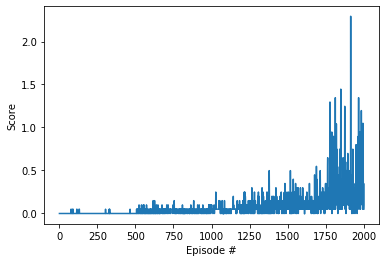

In [49]:
agents = []
for i in range(num_agents):
    agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=2))

#4. Increase max_t from 300 to 1,000
scores = ddpg(agents, num_agents, n_episodes=2000, print_every=20)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

https://knowledge.udacity.com/questions/25366
I realized that Udacity hadn't really used Maddpg to solve tennis after carefully reading the benchmark implementaion section.They actually used shared networks with a shared replay buffer and treated this as a simple continuous control problem with two parallel agents (similar to multi-agents reacher environment).Thus each agent doesn't care about the other agent's action.I tried this simpler approach and was able to solve the environment.I guess in the tennis environment it is not that important what the other agent is doing especially this is not really competitive environment because the score is derived from the maximum reward between each agent's reward.

### 5. Watch a Smart Agent!
In the next code cell, you will load the trained weights from file to watch a smart agent!

In [ ]:
def watch_agent(agent):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)
        
        env_info = env.step(actions)[brain_name]

        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [761]:
multi_agent = MultiAgentDDPGwCritic(num_agents, state_size, action_size)

for i in range(len(multi_agent.agents)):
    agents[i].actor_local.load_state_dict(torch.load('simple_agent_checkpoint_actor_{}.pth'.format(i)))
    agents[i].critic_local.load_state_dict(torch.load('simple_agent_checkpoint_critic_{}.pth'.format(i)))

In [51]:

env.close()